# 1. IMPORT AND INSTALL DEPENDENCIES


In [117]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib


In [9]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2.KEY POINTS USING MP HOLISTIC


In [10]:
import mediapipe as mp
mp_holisti  = mp.solutions.holistic  #holistic model
mp_drawing = mp.solutions.drawing_utils  #drawing utilities

In [11]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #color conversion bgr 2 rgb
    image.flags.writeable = False                    #image is no longer writable
    results = model.process(image)                  #make prediction
    image.flags.writeable = True                     #image is now writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  #color conversion rgb 2 bgr
    return image, results

In [12]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS) #draw face connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #pose connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #left hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #right hand connections

In [13]:
def draw_styled_landmarks(image, results):
    #draw face connections
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                             ) 
    #pose connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) 
    #left hand connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)) 
    #right hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
                             ) 
    

In [20]:
import mediapipe as mp
import numpy as np
mp_holistic  = mp.solutions.holistic  #holistic model
mp_drawing = mp.solutions.drawing_utils  #drawing utilities
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
       
        #Draw landmarks
        draw_styled_landmarks(image, results)
        

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [21]:
len(results.face_landmarks.landmark)

468

In [22]:
results


mediapipe.python.solution_base.SolutionOutputs

In [23]:
draw_styled_landmarks(frame, results)

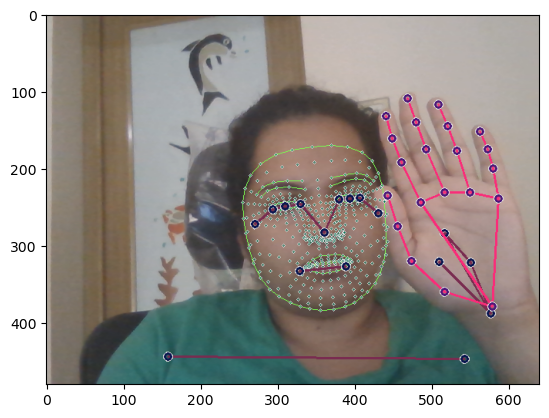

In [24]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3.EXTRACT KEYPOINT VALUES

In [25]:
len(results.left_hand_landmarks.landmark) *3

63

In [26]:
pose = []
for res in results.pose_landmarks.landmark:
    test=np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [27]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()  if results.right_hand_landmarks else np.zeros(21*3)

In [28]:
len(results.face_landmarks.landmark)*3

1404

In [29]:
pose.shape

(132,)

In [30]:
np.zeros(21*3).shape


(63,)

In [31]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()  if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [32]:
result_test = extract_keypoints(results)

In [33]:
result_test

array([ 0.56471962,  0.58964372, -1.2729224 , ...,  0.        ,
        0.        ,  0.        ])

In [34]:
468*3+33*4+21*3+21*3

1662

In [35]:
np.save('0', result_test)

# 4.SETUP FOLDERS FOR COLLECTION

In [80]:
#Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['Hello', 'Thank you', 'I Love You','Me or I', 'Help','More','Yes','No'])

#Thirty videos worth of data
no_sequences = 30

#Videos are going to be 30 frames in length
sequence_length = 30

In [81]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5.COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING

In [38]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
   
    #NEW LOOP
    #Loop through actions
    for action in actions:
        #Loop through sequences aka videos
        for sequence in range(no_sequences):
            #Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                

                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)
                    print(results)

                    #Draw landmarks
                    draw_styled_landmarks(image, results)
                    
                    #NEW 
                    #Apply wait logic
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                        cv2.putText(image, ' Collecting frames for {} Video Number {}'.format(action, sequence),(15,12),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        cv2.waitKey(2000)
                    else:
                        cv2.putText(image, ' Collecting frames for {} Video Number {}'.format(action, sequence),(15,12),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)

                    
                    #NEW Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)
                   
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [39]:
cap.release()
cv2.destroyAllWindows()

# 6.PREPROCESS DATA AND CREATE LABELS AND FEATURES


In [82]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [83]:
label_map = {label:num for num, label in enumerate(actions)}

In [84]:
label_map


{'Hello': 0,
 'Thank you': 1,
 'I Love You': 2,
 'Me or I': 3,
 'Help': 4,
 'More': 5,
 'Yes': 6,
 'No': 7}

In [85]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [86]:
np.array(sequences).shape

(240, 30, 1662)

In [87]:
np.array(labels).shape

(240,)

In [88]:
x= np.array(sequences)

In [89]:
x.shape

(240, 30, 1662)

In [90]:
y = to_categorical(labels).astype(int)

In [91]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [93]:
y_test.shape

(12, 8)

# 7.BUILD AND TRAIN LSTM NEURAL NETWORK

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [95]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [96]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences= True, activation = 'relu'))
model.add(LSTM(64, return_sequences= False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [97]:
[actions.shape[0]]

[8]

In [98]:
model.compile(optimizer= 'Adam', loss='categorical_crossentropy', metrics = ['categorical_accuracy'])

In [57]:
model.fit(x_train, y_train, epochs= 2000, callbacks=[tb_callback])

Epoch 1/2000
8/8 [==============================] - 4s 116ms/step - loss: 8.2272 - categorical_accuracy: 0.1053
Epoch 2/2000
8/8 [==============================] - 1s 74ms/step - loss: 3.3527 - categorical_accuracy: 0.1053
Epoch 3/2000
8/8 [==============================] - 1s 74ms/step - loss: 2.1493 - categorical_accuracy: 0.0789
Epoch 4/2000
8/8 [==============================] - 1s 72ms/step - loss: 2.0637 - categorical_accuracy: 0.1579
Epoch 5/2000
8/8 [==============================] - 1s 67ms/step - loss: 2.0079 - categorical_accuracy: 0.2018
Epoch 6/2000
8/8 [==============================] - 1s 68ms/step - loss: 1.9691 - categorical_accuracy: 0.1754
Epoch 7/2000
8/8 [==============================] - 1s 71ms/step - loss: 2.0235 - categorical_accuracy: 0.1623
Epoch 8/2000
8/8 [==============================] - 1s 72ms/step - loss: 1.9527 - categorical_accuracy: 0.2061
Epoch 9/2000
8/8 [==============================] - 1s 79ms/step - loss: 1.6195 - categorical_accuracy: 0.3728


In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
Total params: 596,840
Trainable params: 596,840
Non-trainable params: 0
________________________________________________

# 8.MAKE PREDICTIONS

In [100]:
res= model.predict(x_test)

In [101]:
actions[np.argmax(res[5])]

'Thank you'

In [102]:
actions[np.argmax(y_test[3])]

'Thank you'

# 9.SAVE WEIGHTS

In [103]:
model.save('action.h5')

# 10.EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [104]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [105]:
yhat = model.predict(x_test)

In [106]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [107]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 0, 11],
        [ 0,  1]],

       [[ 9,  0],
        [ 3,  0]],

       [[ 9,  0],
        [ 3,  0]],

       [[11,  0],
        [ 1,  0]],

       [[10,  0],
        [ 2,  0]],

       [[11,  0],
        [ 1,  0]],

       [[11,  0],
        [ 1,  0]]], dtype=int64)

In [108]:
accuracy_score(ytrue, yhat)

0.08333333333333333

# 11.TEST IN REAL TIME

In [109]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,17), (16,254,116), (245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame= input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame,(0,60+num*40), (int(prob*100), 90+num*40), colors[num],-1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [114]:
# 1.New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8




cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
       
        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0,keypoints)
        sequence.append(keypoints)
        
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
        
        # 3.Visualisation Logic
        if len(predictions) >= 10 and np.unique(predictions[-10:])[0]==np.argmax(res):
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                    
        if len(sentence) > 5:
            sentence = sentence[-5:]
            
        #Viz probabilities
       # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
        cv2.putText(image,' '.join(sentence), (3,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        #cv2.putText(frame, "Sign Language: {}".format(sentence), (10, 30),
                 #   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [115]:
 cap.release()
 cv2.destroyAllWindows()

In [116]:
res[np.argmax(res)] > threshold

False